## Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


### Creating Sales Database

In [3]:
# create a sqlite data base
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

### Creating a Table

In [7]:
cursor.execute("DROP TABLE IF EXISTS sales")

In [ ]:
# Create table
cursor.execute("""
CREATE TABLE sales (
   sales_id INTEGER PRIMARY KEY AUTOINCREMENT,
   order_date varchar(20) not null, 
   customer_id int not null,
   total_amount decimal(12,2) null default 0,
   order_number varchar(10) null,
   product varchar(20) null,
   unit_price decimal(12,2) not null default 0,
   quantity int not null default 1
)
""")

### Insert data

In [8]:
# Insert data
sales_data = [
    ('Jul  4 2012 12:00:00',85,440.00,'542378','chai',14.00,12),
    ('Jul  5 2012 12:00:00',79,1863.40,'542379','pizza',9.80,10),
    ('Jul  8 2012 12:00:00',34,1813.00,'542380','samosa',34.80,5),
    ('Jul  8 2012 12:00:00',84,670.80,'542381','fafda',18.60,9),
    ('Jul  9 2012 12:00:00',76,3730.00,'542382','kaju_katli',42.40,40),
    ('Jul 10 2012 12:00:00',34,1444.80,'542383','jalebi',7.70,10),
    ('Jul 11 2012 12:00:00',14,625.20,'542384','peda',42.40,35),
    ('Jul 12 2012 12:00:00',68,2490.50,'542385','dosa',16.80,15),
    ('Jul 15 2012 12:00:00',88,517.80,'542386','chole_bhature',16.80,6),
    ('Jul 16 2012 12:00:00',35,1119.90,'542387','aloo_paratha',15.60,15)
]

cursor.executemany("""
INSERT INTO sales (order_date, customer_id, total_amount, order_number, product, unit_price, quantity)
VALUES (?, ?, ?, ?, ?, ?, ?)
""", sales_data)

conn.commit()
cursor.close()
conn.close()

### Showing the table

In [9]:
conn = sqlite3.connect('sales_data.db')
query = conn.execute("select * from sales")
print('sales_id','order_date','order_number','total_amount','customer_id','product_id','unit_price','quantity')
for i in query:
    print(i[0],' ',i[1],'    ', i[2],'     ',   i[4],'      ',   i[3],'     ', i[5],'   ', i[6],'   ',i[7])
    

sales_id order_date order_number total_amount customer_id product_id unit_price quantity
1   Jul  4 2012 12:00:00      85       542378        440       chai     14     12
2   Jul  5 2012 12:00:00      79       542379        1863.4       pizza     9.8     10
3   Jul  8 2012 12:00:00      34       542380        1813       samosa     34.8     5
4   Jul  8 2012 12:00:00      84       542381        670.8       fafda     18.6     9
5   Jul  9 2012 12:00:00      76       542382        3730       kaju_katli     42.4     40
6   Jul 10 2012 12:00:00      34       542383        1444.8       jalebi     7.7     10
7   Jul 11 2012 12:00:00      14       542384        625.2       peda     42.4     35
8   Jul 12 2012 12:00:00      68       542385        2490.5       dosa     16.8     15
9   Jul 15 2012 12:00:00      88       542386        517.8       chole_bhature     16.8     6
10   Jul 16 2012 12:00:00      35       542387        1119.9       aloo_paratha     15.6     15


### Query the Data and Load into Pandas

In [10]:
#  Connect to the database
conn = sqlite3.connect("sales_data.db")

#  Run SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(unit_price * quantity) AS revenue 
FROM sales 
GROUP BY product
"""

#  Load the result into pandas
df = pd.read_sql_query(query, conn)

# Close the DB connection
conn.close()

#  Print the results
print("Sales Summary:")
print(df)

Sales Summary:
         product  total_qty  revenue
0   aloo_paratha         15    234.0
1           chai         12    168.0
2  chole_bhature          6    100.8
3           dosa         15    252.0
4          fafda          9    167.4
5         jalebi         10     77.0
6     kaju_katli         40   1696.0
7           peda         35   1484.0
8          pizza         10     98.0
9         samosa          5    174.0


### Plot a bar chart of revenue by product

<Figure size 1000x600 with 0 Axes>

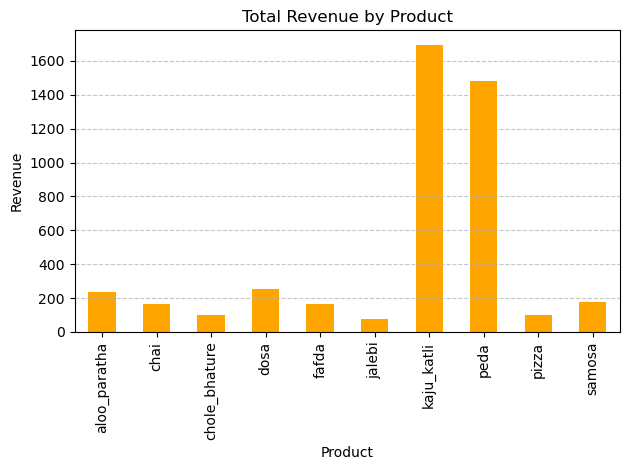

In [11]:
#  Plot a bar chart of revenue by product
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='revenue', color='orange', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Save the chart as an image

In [15]:
# Save the chart as an image
plt.savefig("sales_summary_chart.png")

<Figure size 640x480 with 0 Axes>